In [1]:
import sys
from pathlib import Path

# enable autoreload
%load_ext autoreload
%autoreload 2


def find_project_root(start=Path.cwd(), markers=(".git", "pyproject.toml", "setup.py"), max_up=10):
    p = start.resolve()
    for _ in range(max_up):
        if any((p / m).exists() for m in markers):
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root()
sys.path.insert(0, str(root))
print("Added to sys.path:", root)

Added to sys.path: F:\ProgrammingStuff\ML\end-to-end-semantic-segmentation


# Imports

In [2]:
import torch
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor
from PIL import Image
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [ ]:


model_name = "nvidia/segformer-b5-finetuned-ade-640-640"
# model_name = "nvidia/segformer-b2-finetuned-ade-512-512"

from typing import cast
proc = SegformerImageProcessor.from_pretrained(model_name)
if isinstance(proc, tuple):
    processor = proc[0]
else:
    processor = proc
processor = cast(SegformerImageProcessor, processor)
m = SegformerForSemanticSegmentation.from_pretrained(model_name)
if isinstance(m, tuple):
    model = m[0]
else:
    model = m
model = cast(SegformerForSemanticSegmentation, model)

image = Image.open("train1017.png").convert("RGB")
inputs = processor(images=image, return_tensors="pt")

print(inputs.keys())

with torch.no_grad():
    outputs = model(**inputs)

seg = outputs.logits  # (batch, 150, h, w) for ADE20K (150 classes)



i:\MyProgramnFiles\MiniConda\envs\sem-seg\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
i:\MyProgramnFiles\MiniConda\envs\sem-seg\lib\site-packages\transformers\models\segformer\image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


dict_keys(['pixel_values'])


In [59]:
# import numpy as np

# CITYSCAPES_COLORMAP = np.array([
#     (128,  64, 128),  #  0: road
#     (244,  35, 232),  #  1: sidewalk
#     ( 70,  70,  70),  #  2: building
#     (102, 102, 156),  #  3: wall
#     (190, 153, 153),  #  4: fence
#     (153, 153, 153),  #  5: pole
#     (250, 170,  30),  #  6: traffic light
#     (220, 220,   0),  #  7: traffic sign
#     (107, 142,  35),  #  8: vegetation
#     (152, 251, 152),  #  9: terrain
#     ( 70, 130, 180),  # 10: sky
#     (220,  20,  60),  # 11: person
#     (255,   0,   0),  # 12: rider
#     (  0,   0, 142),  # 13: car
#     (  0,   0,  70),  # 14: truck
#     (  0,  60, 100),  # 15: bus
#     (  0,  80, 100),  # 16: train
#     (  0,   0, 230),  # 17: motorcycle
#     (119,  11,  32),  # 18: bicycle
# ], dtype=np.uint8)

In [60]:
# from typing import Union


# def label_to_color_image(label: np.ndarray, colormap: np.ndarray = CITYSCAPES_COLORMAP) -> np.ndarray:
#     """
#     Convert a 2D label image (H,W) with trainIds 0..N-1 into an RGB image (H,W,3).
#     - label: 2D numpy array of integers (trainId). Values outside [0, colormap.shape[0]-1]
#              will be shown as black (0,0,0).
#     - colormap: (N,3) uint8 array mapping id -> RGB.
#     Returns: uint8 RGB image.
#     """
#     if label.ndim != 2:
#         raise ValueError("label must be 2D (H,W)")

#     h, w = label.shape
#     color_image = np.zeros((h, w, 3), dtype=np.uint8)

#     # Create mask for valid ids
#     max_id = colormap.shape[0] - 1
#     valid_mask = (label >= 0) & (label <= max_id)

#     # For performance: flat indexing
#     flat_label = label.ravel()
#     flat_color = color_image.reshape(-1, 3)

#     # Assign colors for valid label indices
#     indices = np.where(valid_mask.ravel())[0]
#     if indices.size:
#         flat_color[indices] = colormap[flat_label[indices]]

#     return color_image

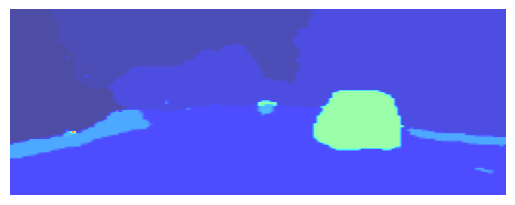

In [61]:
preds = seg.argmax(dim=1)

output_image = F.interpolate(preds.unsqueeze(1).float(), size=image.size[::-1], mode="bilinear").squeeze().byte().cpu().numpy()

plt.imshow(output_image, cmap="jet", alpha=0.7)
plt.axis("off")
plt.show()

In [62]:
from typing import cast


model_path_b0_cityscapes = "nvidia/segformer-b5-finetuned-cityscapes-1024-1024"
# model_name = "nvidia/segformer-b2-finetuned-ade-512-512"

proc = SegformerImageProcessor.from_pretrained(model_path_b0_cityscapes)
if isinstance(proc, tuple):
    proc_segformer_b0_cityscapes = proc[0]
else:
    proc_segformer_b0_cityscapes = proc
proc_segformer_b0_cityscapes = cast(SegformerImageProcessor, proc_segformer_b0_cityscapes)

m = SegformerForSemanticSegmentation.from_pretrained(model_path_b0_cityscapes)
if isinstance(m, tuple):
    model_segformer_b0_cityscapes = m[0]
else:
    model_segformer_b0_cityscapes = m

model_segformer_b0_cityscapes = cast(SegformerForSemanticSegmentation, model_segformer_b0_cityscapes)


In [63]:
image = Image.open("train1017.png").convert("RGB")
inputs = proc_segformer_b0_cityscapes(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model_segformer_b0_cityscapes(**inputs)

seg = outputs.logits  # (batch, 150, h, w) for ADE20K (150 classes)

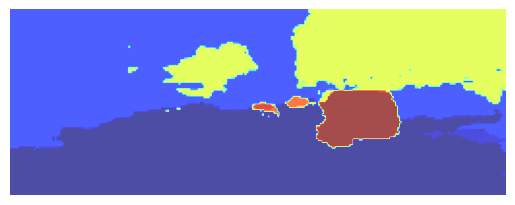

In [64]:
preds = seg.argmax(dim=1)

output_image = F.interpolate(preds.unsqueeze(1).float(), size=image.size[::-1], mode="bilinear").squeeze().byte().cpu().numpy()

plt.imshow(output_image, cmap="jet", alpha=0.7)
plt.axis("off")
plt.show()

# Dataset

## Segformer Dataset

In [3]:
import os
from PIL import Image
import numpy as np
from torch.utils.data import Dataset
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from datasets.segformer_dataset import SegformerDataset

In [4]:
from torch.utils.data import DataLoader
from from_root import from_root

In [5]:
# load an empty Segformer model for further training

from transformers import SegformerConfig, SegformerForSemanticSegmentation, SegformerImageProcessor

segformer_config = SegformerConfig.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

segformer_model = SegformerForSemanticSegmentation(segformer_config)

segformer_improc= SegformerImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

i:\MyProgramnFiles\MiniConda\envs\sem-seg\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
i:\MyProgramnFiles\MiniConda\envs\sem-seg\lib\site-packages\transformers\models\segformer\image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [6]:
from datasets.transforms import SegformerTransform

data_root = "F:\ProgrammingStuff\ML\end-to-end-semantic-segmentation/data/ade20k/"

segformer_transform = SegformerTransform(segformer_improc)

segformer_dataset_train = SegformerDataset(
    root=data_root, img_dir="images/train", mask_dir="masks/train", transforms=segformer_transform
)
segformer_dataset_val = SegformerDataset(
	root=data_root, img_dir="images/val", mask_dir="masks/val", transforms=segformer_transform
)

In [7]:
segformer_transform

SegformerTransform(image_processor=SegformerImageProcessor {
  "do_normalize": true,
  "do_reduce_labels": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "SegformerFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "SegformerImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 512,
    "width": 512
  }
}
)

In [8]:
import pytorch_lightning as pl
from logger import logger


class SegformerLitModel(pl.LightningModule):
    def __init__(
        self, model: SegformerForSemanticSegmentation, learning_rate: float = 1e-4
    ):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.criterion = torch.nn.CrossEntropyLoss(ignore_index=255)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, masks = batch
        outputs = self.model(images)
        logits = TF.resize(outputs.logits, size=masks.shape[1:], interpolation=Image.NEAREST)
        # print(np.max(masks.detach().numpy()))
        # print(np.max(logits.detach().numpy()))
        loss = self.criterion(logits, masks)
        self.log("train_loss", loss)
        return loss
    
    def validation_step(self, batch, batch_idx):
        images, masks = batch
        outputs = self.model(images)
        logits = outputs.logits
        logits = TF.resize(outputs.logits, size=masks.shape[1:], interpolation=Image.NEAREST)
        loss = self.criterion(logits, masks)
        self.log("val_loss", loss)
        return loss
    
    def on_train_epoch_end(self) -> None:
        logger.info(f"Epoch {self.current_epoch} finished.")


    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        return optimizer

2025-11-25 06:06:26,481 - sem_seg - INFO - Logger initialized, logging to logs/sem_seg_log_2025-11-25_06-06-26.log


## Traing

In [9]:
# Training setup
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from transformers import SegformerConfig, SegformerForSemanticSegmentation
from logger import logger

# Wrap in LightningModule (defined earlier in the notebook)
lit = SegformerLitModel(segformer_model, learning_rate=1e-4)

# DataLoader (uses segformer_dataset_train defined earlier in the notebook)
train_loader = DataLoader(
    segformer_dataset_train, batch_size=4, shuffle=True, num_workers=0, pin_memory=True
)

val_loader = DataLoader(
	segformer_dataset_val, batch_size=4, shuffle=False, num_workers=0, pin_memory=True
)

# Trainer — adjust epochs/devices as needed
accelerator = "gpu" if torch.cuda.is_available() else "cpu"
trainer = pl.Trainer(max_epochs=5, accelerator=accelerator, limit_train_batches=5)

trainer.fit(lit, train_loader, val_loader)

print("Training finished")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
i:\MyProgramnFiles\MiniConda\envs\sem-seg\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                             | Params
---------------------------------------------------------------
0 | model     | SegformerForSemanticSegmentation | 3.8 M 
1 | criterion | CrossEntropyLoss              

Sanity Checking: 0it [00:00, ?it/s]

i:\MyProgramnFiles\MiniConda\envs\sem-seg\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
i:\MyProgramnFiles\MiniConda\envs\sem-seg\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
i:\MyProgramnFiles\MiniConda\envs\sem-seg\lib\site-packages\pytorch_lightning\loops\fit_loop.py:281: PossibleUserWarning: The number of training batches (5) is smaller than the logging

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

2025-11-25 06:06:40,938 - sem_seg - INFO - Epoch 0 finished.


Validation: 0it [00:00, ?it/s]

2025-11-25 06:06:51,372 - sem_seg - INFO - Epoch 1 finished.


Validation: 0it [00:00, ?it/s]

2025-11-25 06:07:02,136 - sem_seg - INFO - Epoch 2 finished.


Validation: 0it [00:00, ?it/s]

2025-11-25 06:07:12,816 - sem_seg - INFO - Epoch 3 finished.


Validation: 0it [00:00, ?it/s]

2025-11-25 06:07:23,504 - sem_seg - INFO - Epoch 4 finished.
`Trainer.fit` stopped: `max_epochs=5` reached.


Training finished
